In [112]:
# import necessary packages
import pandas as pd
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter
import os

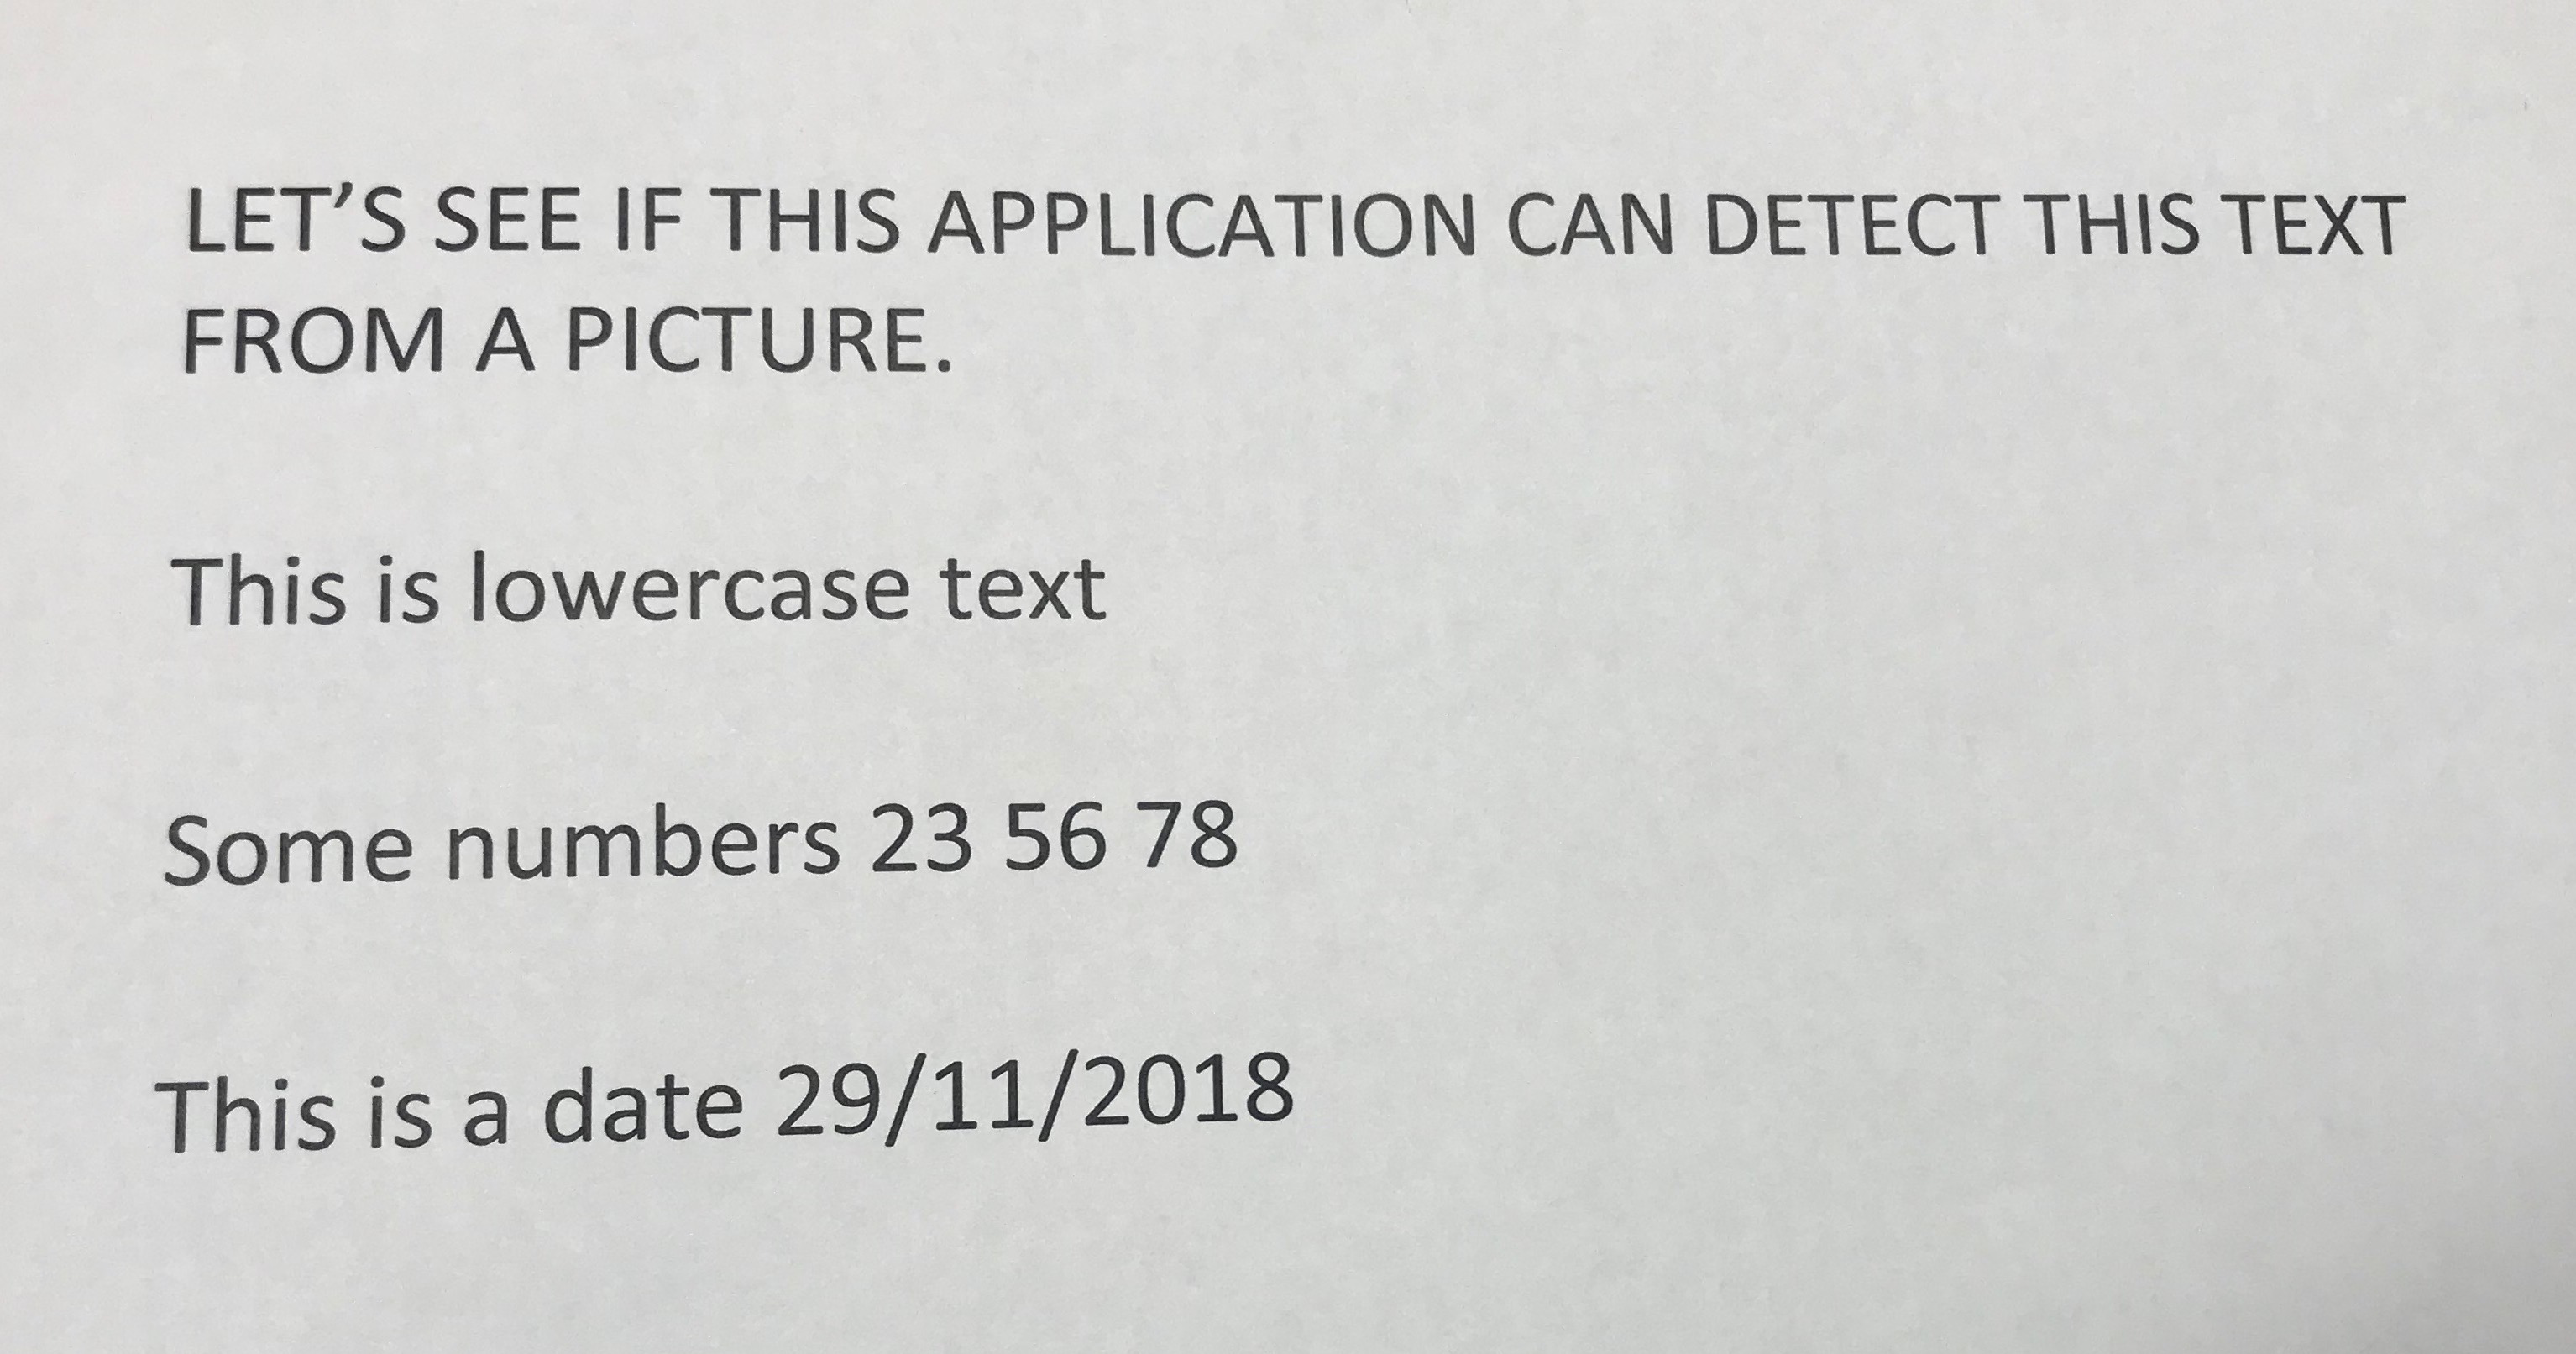

In [113]:
# get names of files in directory
path = './input/'

files = os.listdir(path) 
files.remove('.DS_Store')


# load images and convert them to RGBA
images = []

for i in files:
    im = Image.open('./input/'+str(i))
    im = im.convert("RGBA")
    images.append(im)

# show pictures   
images[0]

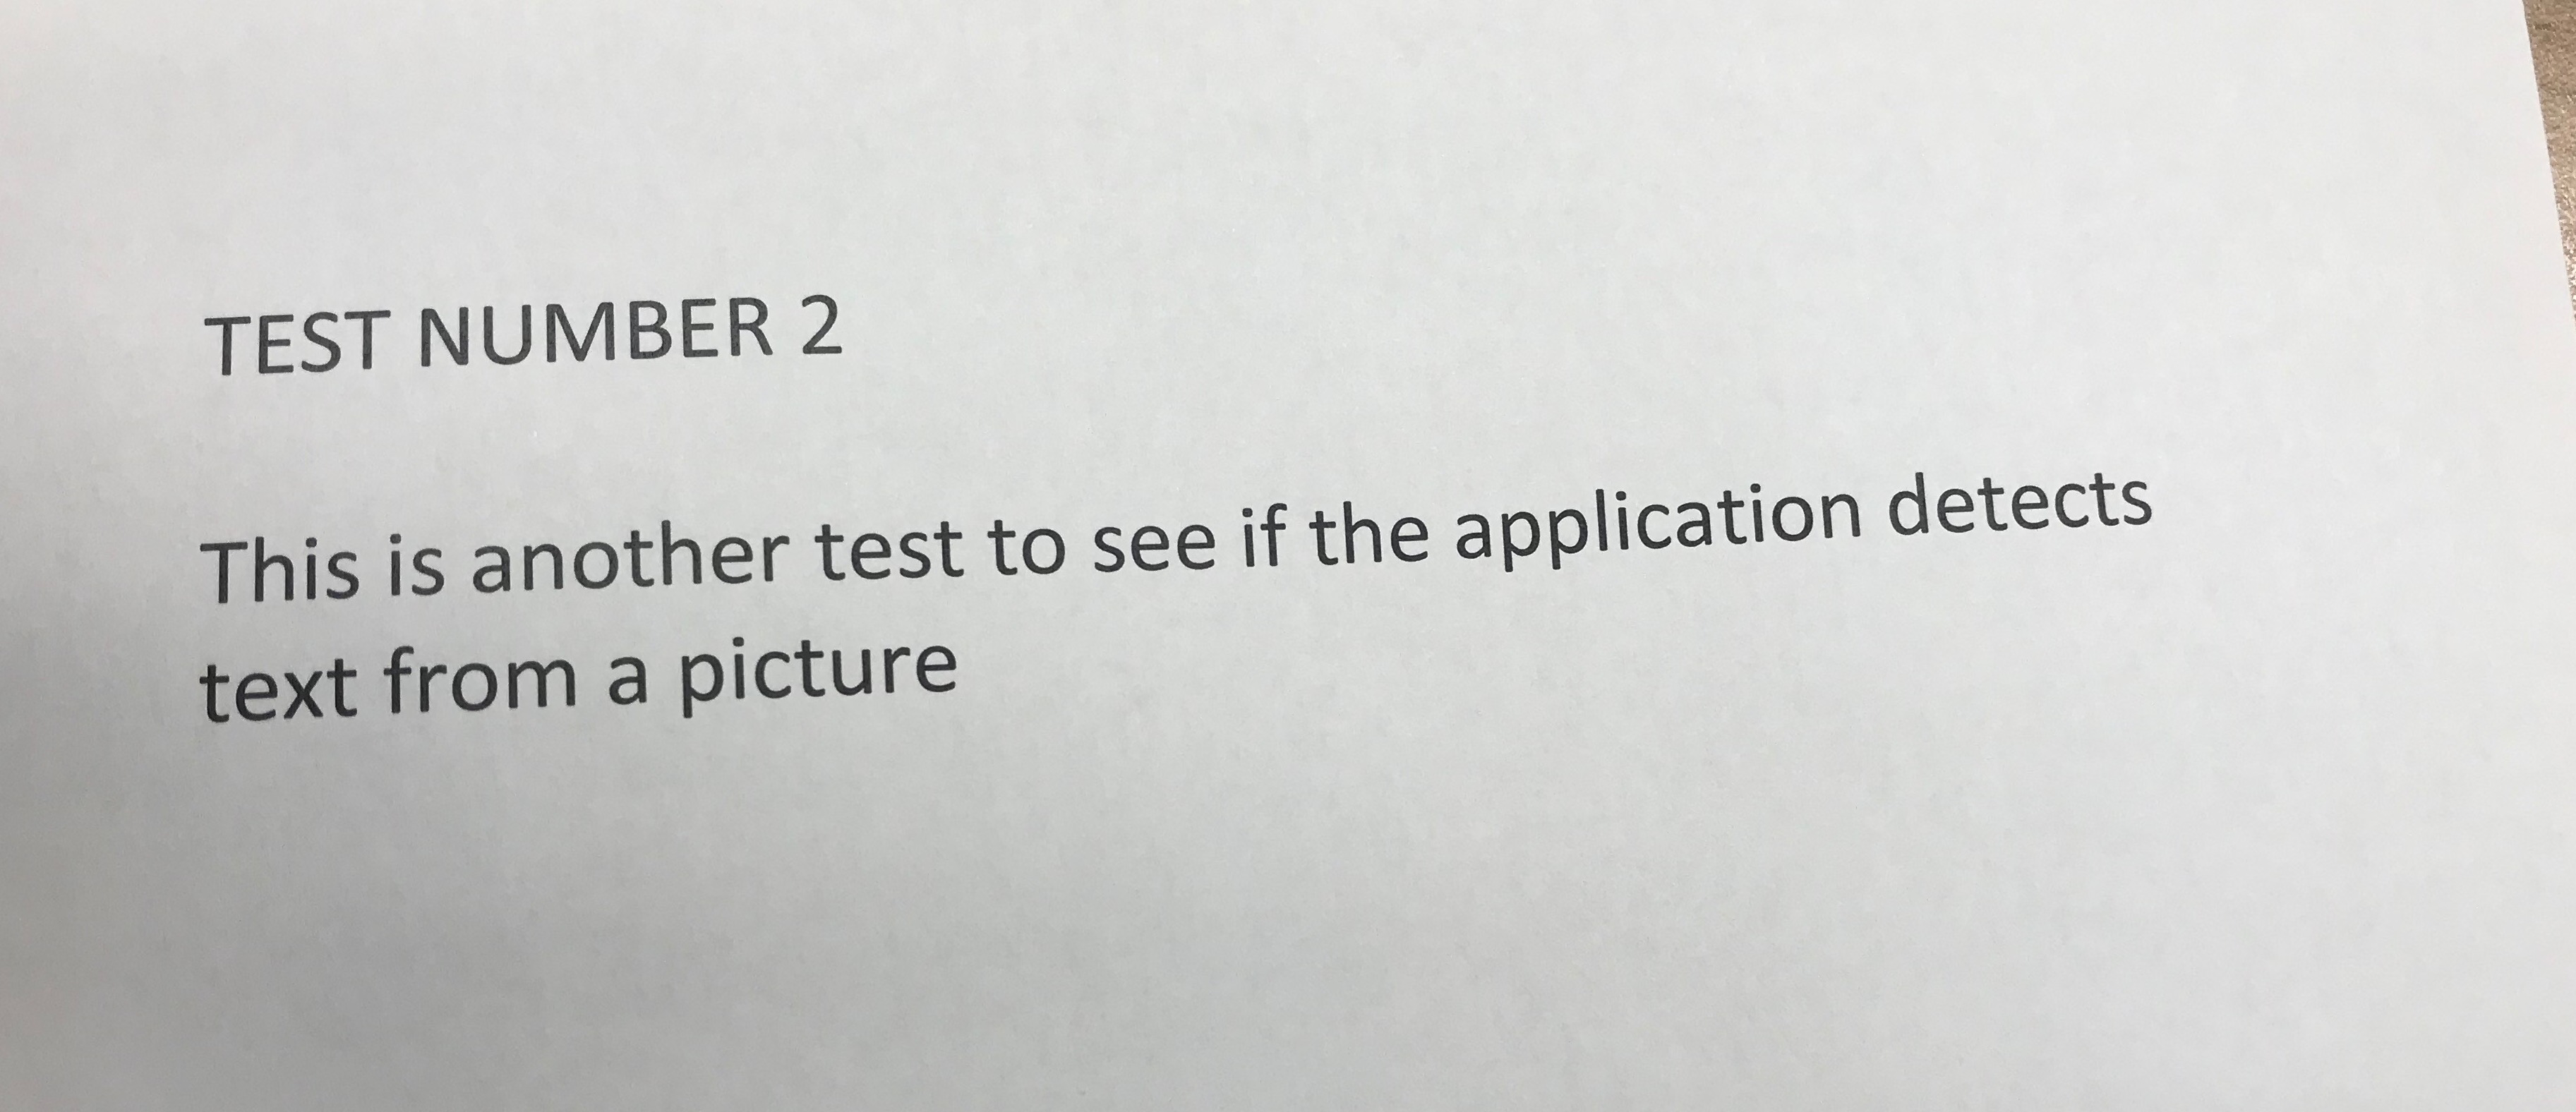

In [114]:
images[1]

In [115]:
# get pixel data from images 
datas = []
for im in images:
    data = im.getdata()
    datas.append(data)


# change pixel data to make images more text on picture more readable. 
newimdata=[]    
for i in range(len(datas)):
    new=[]
    for item in datas[i]:
        if item[0] < 112 or item[1] < 112 or item[2] < 112:
            new.append(item)
        else:
            new.append((255, 255, 255))      
    newimdata.append(new)
        
# replace image data with new image data 
for i in range(len(images)):
    images[i].putdata(newimdata[i])

# extract text and edit text 
texts = []   
for i in range(len(images)):
    enhancer = ImageEnhance.Contrast(images[i])
    image = enhancer.enhance(1.8)
    image = image.convert('1')
    image.save('./processed/processed'+str(i)+'.jpg')
    text = pytesseract.image_to_string(Image.open('./processed/processed'+str(i)+'.jpg'),config='-c tessedit_char_whitelist=\0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHILMNOPQRSTUVWXYZKJ@.,:_ -psm 4', lang='eng')
    text = text.split("\n")
    text = [x for x in text if x]
    text = text[0:6]
    texts.append(text)

In [116]:
print('The text extracted from the first picture is: ')
print(texts[0])

The text extracted from the first picture is: 
["LET'S SEE IF THIS APPLICATION CAN DETECT THiS TEXT", 'FROM A PICTURE.', 'This is lowercase text', 'Some numbers 23 56 78', 'This is a date 29/11/2018']


In [117]:
print('The text extracted from the second picture is: ') 
print(texts[1])

The text extracted from the second picture is: 
['TEST NUMBER 2', 'This is another test to see if the apphcation detects', 'text from a picture']
